In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import chi2

In [2]:
def get_ar_model(c, p, n, phi, burnin=100):
    yt = np.zeros(n + burnin)
    for t in range(p, n + burnin):
        yt[t] = c + np.dot(phi, yt[t - p:t][::-1]) + np.random.normal()
    return yt[burnin:]

In [3]:
def get_ma_model(c, n, q, theta, burnin=100):
    eps = np.random.normal(size=n + burnin)
    ma_model = np.zeros(n + burnin)

    for t in range(q, n + burnin):
        ma_model[t] = c + eps[t] + np.dot(theta, eps[t - q:t][::-1])

    return ma_model[burnin:]

In [4]:
n = 1000
yt_ar = get_ar_model(c=18, p=1, n=n, phi=[0.6])
yt_ma = get_ma_model(c=18, q=1, n=n, theta=[0.6])

In [5]:
def plot_acf_pacf(data, lags=40):
    fig, ax = plt.subplots(2)
    plot_acf(data, lags=lags, ax=ax[0], zero=False, title='Autocorrection Function (ACF)')
    plot_pacf(data, lags=lags, ax=ax[1], zero=False, title='Partial Autocorrection Function (PACF)')
    plt.tight_layout()
    plt.show()


In [6]:
def compare (models, model_name):
    
    model1 = models[0]
    model2 = models[1]
    
    llh_diff = model2.llf - model1.llf
    mod_diff = (model2.df_model - model1.df_model)
    
    llr_stats = 2*llh_diff
    
    p_value = chi2.sf(llr_stats, mod_diff)
    
    print(f"LLR Test Statistic: {llr_stats}, p-value: {p_value}, df_diff: {mod_diff}")
    
    if p_value < 0.05:
        print(f"Null hypothesis Rejected: {model_name}(1) model fits significantly worse than {model_name}(2).")
    else:
        print(f"Null hypothesis Not rejected: {model_name}(1) model does not fit significantly worse than {model_name}(2).")

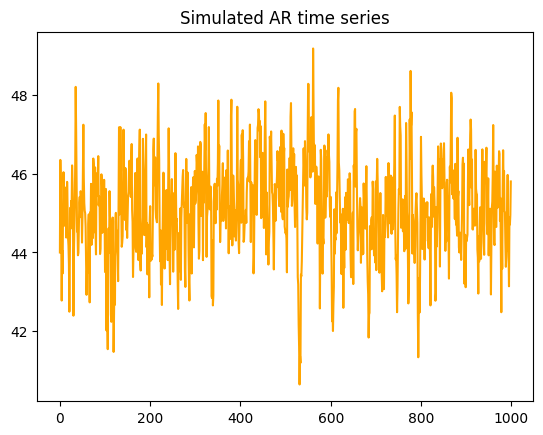

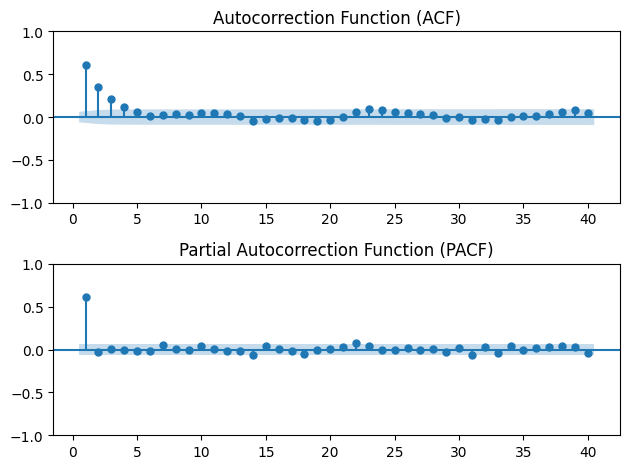

In [7]:

plt.plot(yt_ar, color='orange', label='AR')
plt.title("Simulated AR time series")
plt.show()

plot_acf_pacf(yt_ar)


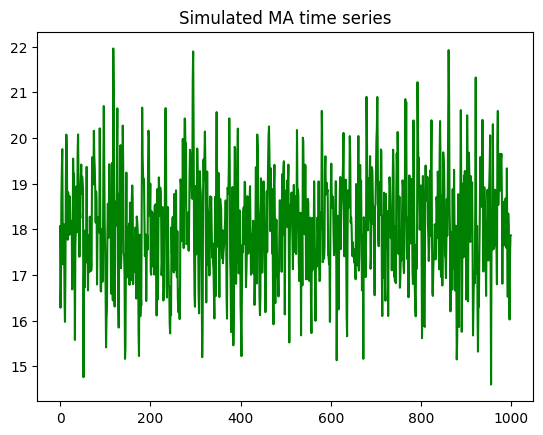

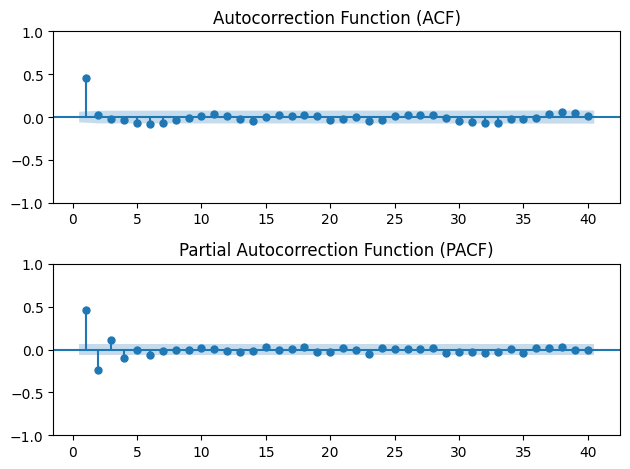

In [8]:
plt.plot(yt_ma, color='green', label='MA')
plt.title("Simulated MA time series")
plt.show()
plot_acf_pacf(yt_ma)

In [9]:
from statsmodels.tsa.arima.model import ARIMA

In [10]:
aic_val = []
models=[]

for i in range(1, 10):
    model = ARIMA(yt_ar, order=(i, 0, 0))
    res = model.fit()
    aic_val.append(res.aic)
    models.append(res)
    print(f"AR({i}) AIC: {res.aic}")


AR(1) AIC: 2751.8257349929145
AR(2) AIC: 2752.8086750650154
AR(3) AIC: 2754.7542821371417
AR(4) AIC: 2756.666046333584
AR(5) AIC: 2758.51897943698
AR(6) AIC: 2760.17166310289
AR(7) AIC: 2759.5304606918608
AR(8) AIC: 2761.509997180421
AR(9) AIC: 2763.3973131392377


In [11]:

min_aic = np.argmin(aic_val)
best_model = models[min_aic]
print(f"Best AR model: {min_aic + 1} with AIC: {aic_val[min_aic]}")

Best AR model: 1 with AIC: 2751.8257349929145


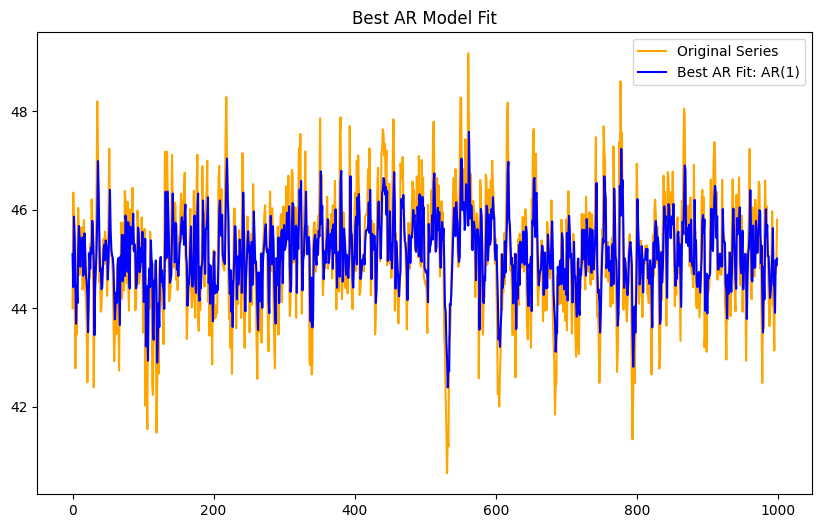

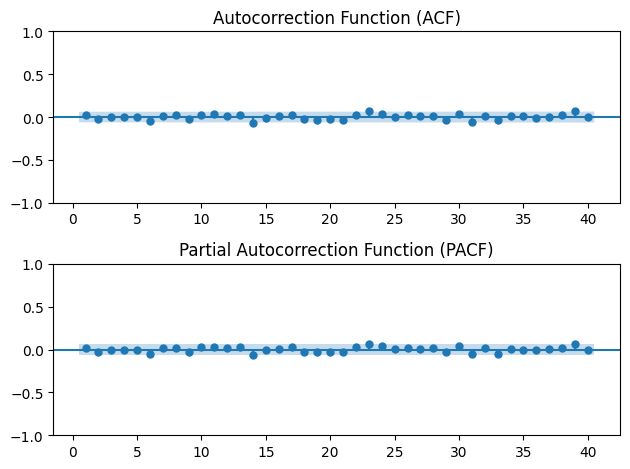

In [12]:

plt.figure(figsize=(10, 6))
plt.plot(yt_ar, label='Original Series', color='orange')
plt.plot(best_model.fittedvalues, label=f'Best AR Fit: AR({min_aic + 1})', color='blue')
plt.title('Best AR Model Fit')
plt.legend(loc='upper right')
plt.show()

residuals = best_model.resid
plot_acf_pacf(residuals)

In [13]:
compare(models, "AR")

LLR Test Statistic: 1.0170599278990267, p-value: 0.3132174190672045, df_diff: 1
Null hypothesis Not rejected: AR(1) model does not fit significantly worse than AR(2).


In [14]:
aic_val = []
models=[]

for i in range(1, 10):
    model = ARIMA(yt_ma, order=(i, 0, 0))
    res = model.fit()
    aic_val.append(res.aic)
    models.append(res)
    print(f"AR({i}) AIC: {res.aic}")

AR(1) AIC: 2899.062045606744
AR(2) AIC: 2841.360689254332
AR(3) AIC: 2831.0795644058817
AR(4) AIC: 2823.0965893446196
AR(5) AIC: 2825.069364467366
AR(6) AIC: 2822.8497928412835
AR(7) AIC: 2824.679314030724
AR(8) AIC: 2826.679282566807
AR(9) AIC: 2828.575828521515


In [15]:
min_aic = np.argmin(aic_val)
best_model = models[min_aic]
print(f"Best AR model: {min_aic + 1} with AIC: {aic_val[min_aic]}")

Best AR model: 6 with AIC: 2822.8497928412835


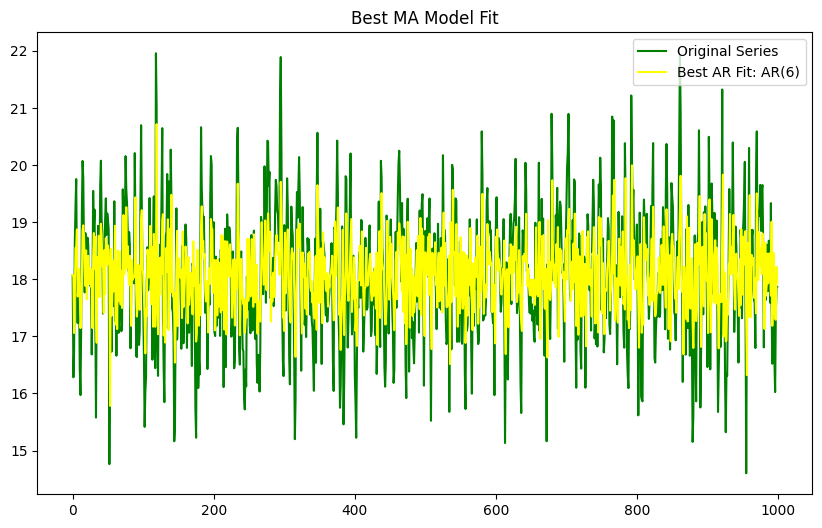

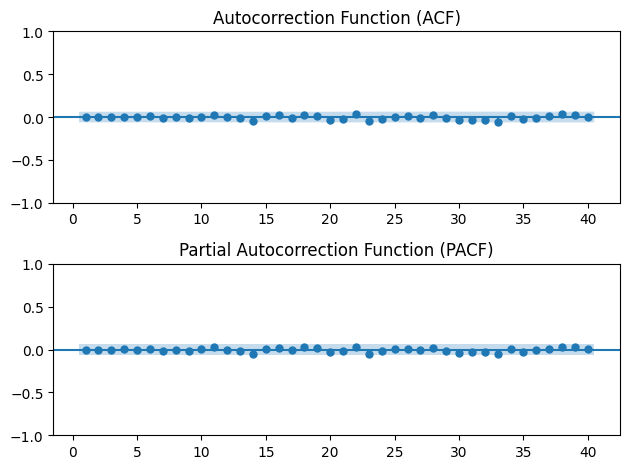

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(yt_ma, label='Original Series', color='green')
plt.plot(best_model.fittedvalues, label=f'Best AR Fit: AR({min_aic + 1})', color='yellow')
plt.title('Best MA Model Fit')
plt.legend(loc='upper right')
plt.show()

residuals = best_model.resid
plot_acf_pacf(residuals)

In [17]:
compare(models, "MA")

LLR Test Statistic: 59.70135635241195, p-value: 1.1040043103539484e-14, df_diff: 1
Null hypothesis Rejected: MA(1) model fits significantly worse than MA(2).
